# About Dataset

**Brazillian E-Commerce Public Dataset by Olist**

Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.



**Context**

This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. For more information, visit the website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.



**Data Schema**
The data is divided in multiple datasets for better understanding and organization. Please refer to the following data schema when working with it:

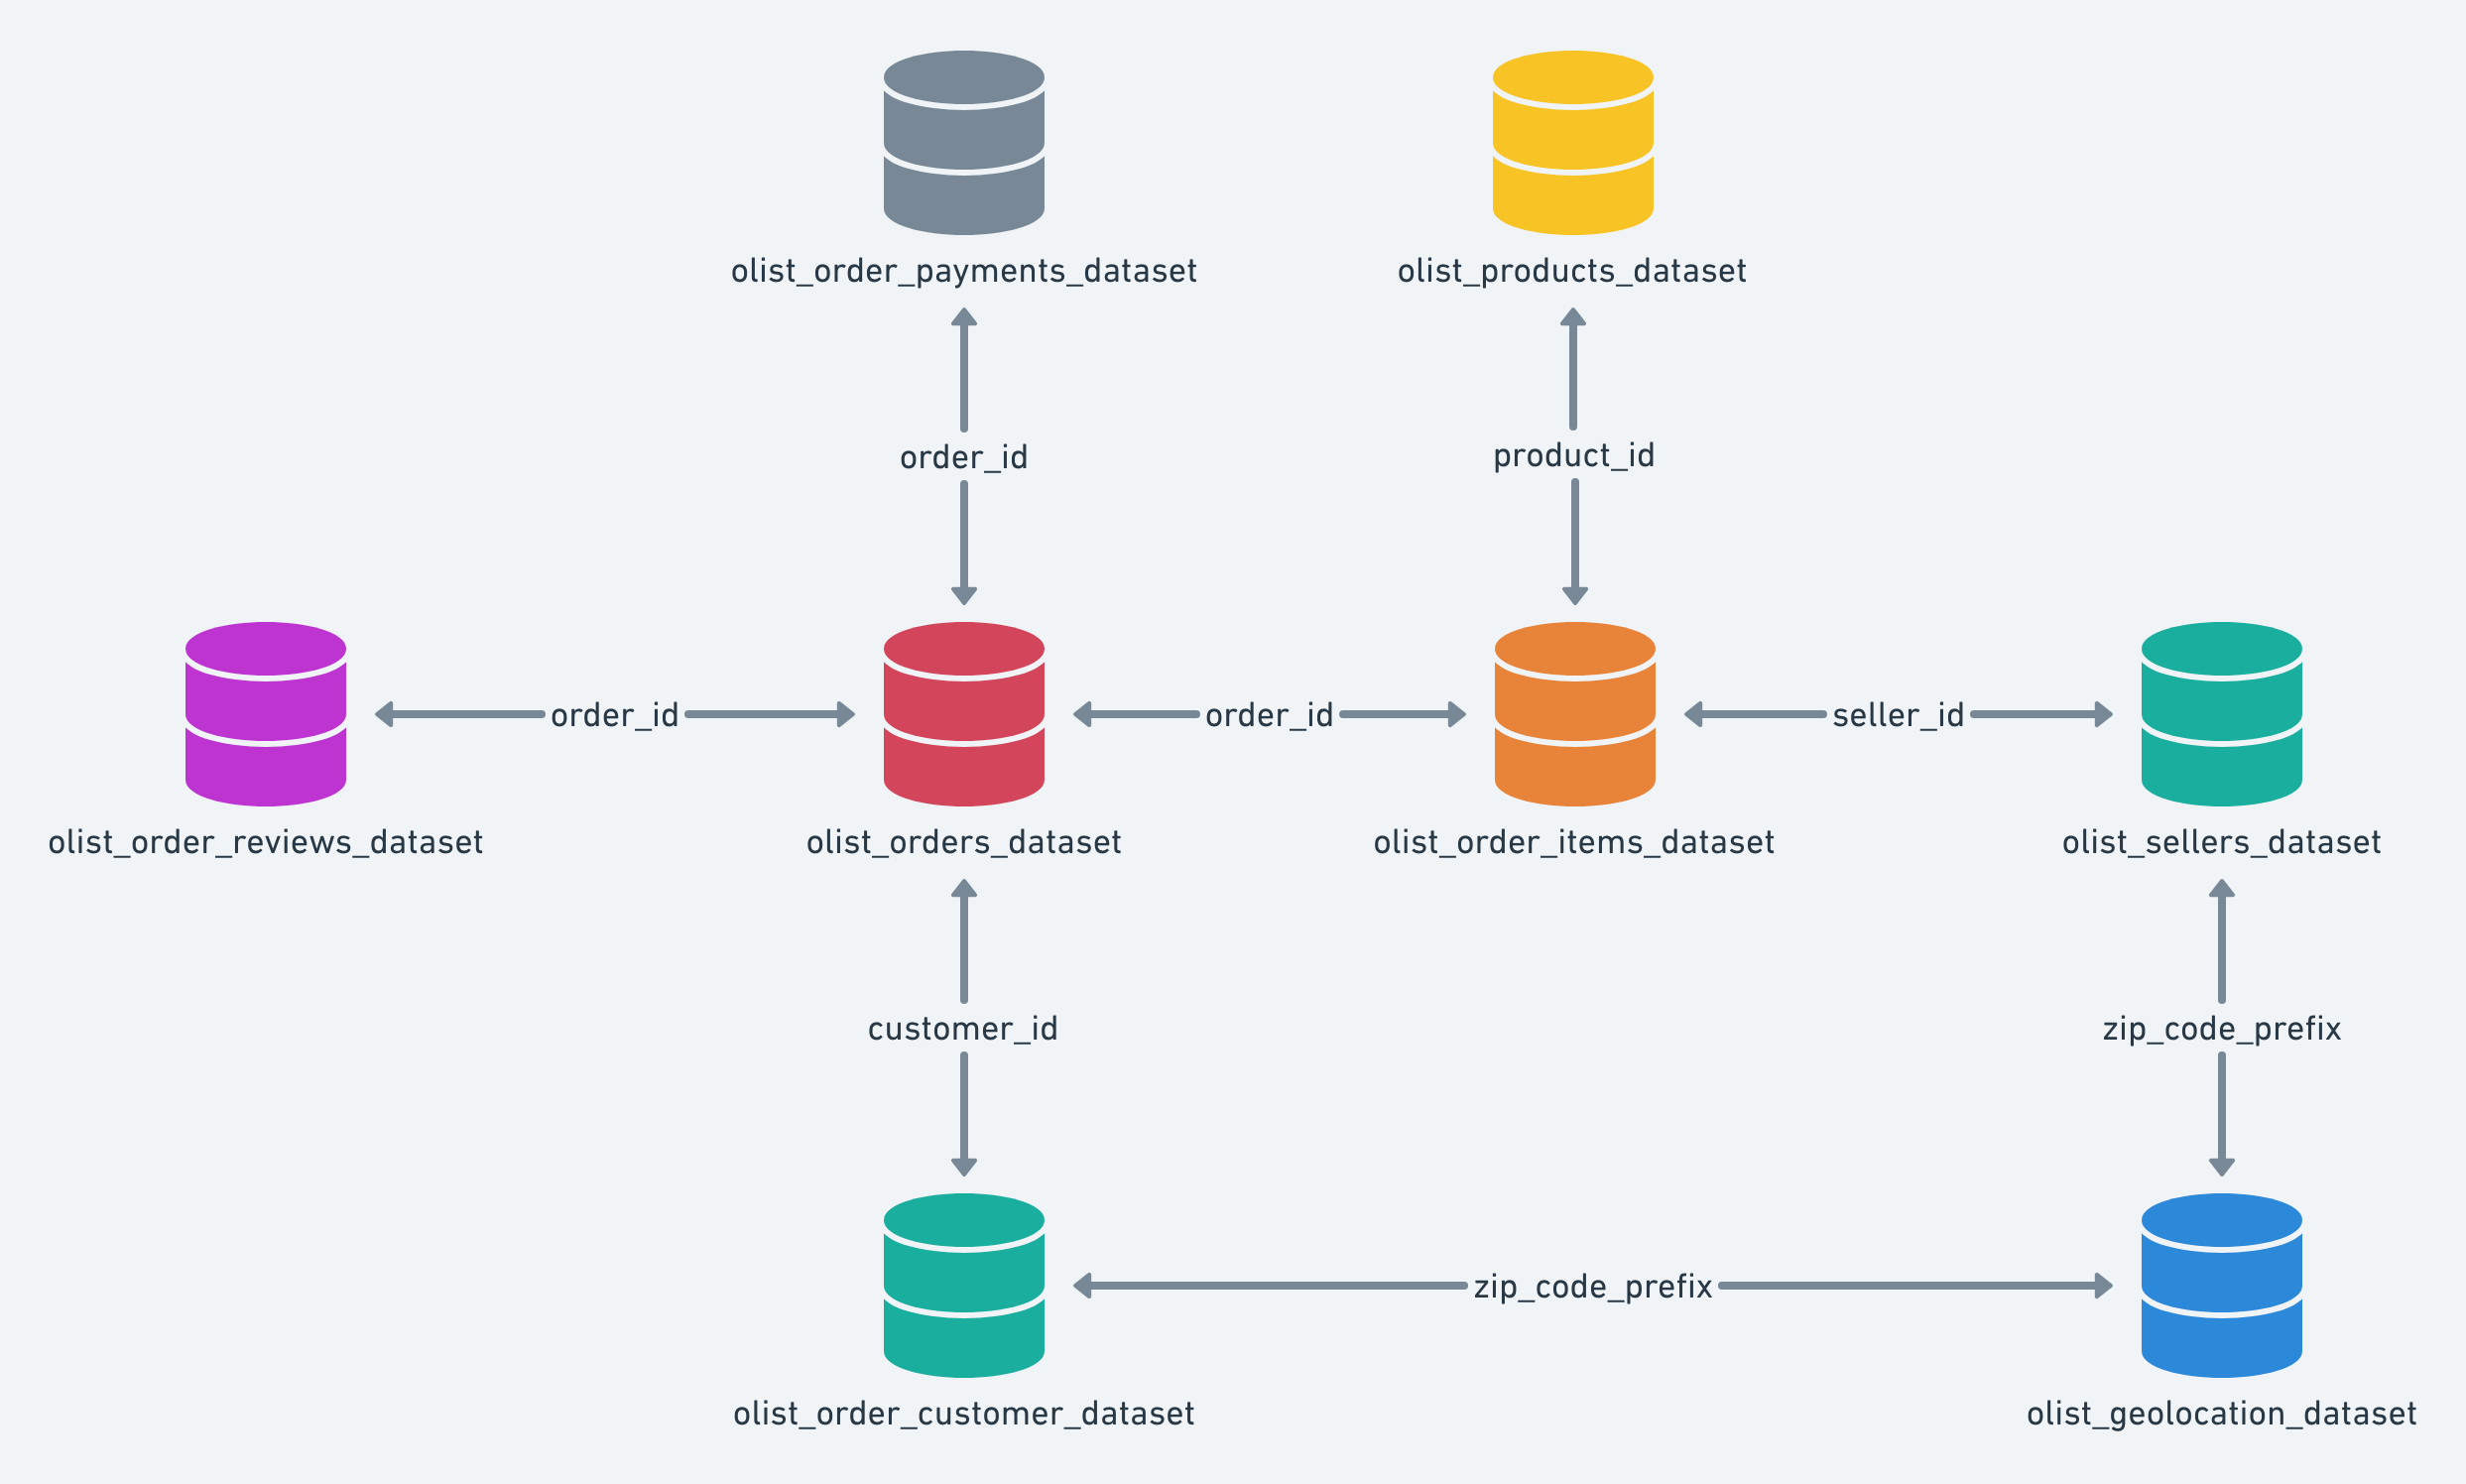

# Exploratory Data Analysis

Libraries

In [78]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

Data Uploading

In [79]:
customers_df= pd.read_csv('/content/olist_customers_dataset.csv')
geolocation_df= pd.read_csv('/content/olist_geolocation_dataset.csv')
items_df= pd.read_csv('/content/olist_order_items_dataset.csv')
payments_df= pd.read_csv('/content/olist_order_payments_dataset.csv')
reviews_df= pd.read_csv('/content/olist_order_reviews_dataset.csv')
orders_df= pd.read_csv('/content/olist_orders_dataset.csv')
products_df= pd.read_csv('/content/olist_products_dataset.csv')
sellers_df= pd.read_csv('/content/olist_sellers_dataset.csv')
category_translation_df= pd.read_csv('/content/product_category_name_translation.csv')

Understanding the dataset

In [80]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [81]:
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [82]:
items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [83]:
payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [84]:
reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [85]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [86]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [87]:
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [88]:
category_translation_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


Eliminating null values and duplicate rows:

In [89]:
datasets = [customers_df, geolocation_df, items_df, payments_df, reviews_df, orders_df, products_df, sellers_df, category_translation_df]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='cividis')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


In [90]:
# Drop the null values
for i in datasets:
    i.dropna(inplace=True)

In [91]:
# Drop the duplicated rows
for i in datasets:
    i.drop(i[i.duplicated()].index, axis=0, inplace=True)

In [92]:
# Check if there are still null values and duplicated rows again
data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='cividis')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",738332,5,0,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",9839,7,0,0,
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",96461,8,0,0,
6,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32340,9,0,0,
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


In [93]:
# Print out the basic information of each data frame
for i in datasets:
    i.info()
    print("*"*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
**************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geoloca

Merge all the data frames

In [94]:
merged_df= pd.merge(customers_df, orders_df, on="customer_id")
merged_df= merged_df.merge(reviews_df, on="order_id")
merged_df= merged_df.merge(items_df, on="order_id")
merged_df= merged_df.merge(products_df, on="product_id")
merged_df= merged_df.merge(payments_df, on="order_id")
merged_df= merged_df.merge(sellers_df, on='seller_id')
merged_df= merged_df.merge(category_translation_df, on='product_category_name')
merged_df.shape

(11578, 40)

In [95]:
merged_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,15.0,35.0,1,credit_card,8,252.25,14940,ibitinga,SP,home_confort
1,ed9d62c3af1f6b24e984d012f66eca35,6a8fdf11c6cc553fe201f827da2f4e65,45970,itanhem,BA,1dfe970583e8a1a09241aa32a815a5b4,delivered,2018-07-18 17:21:49,2018-07-18 17:35:14,2018-07-19 14:43:00,...,15.0,35.0,1,credit_card,10,278.66,14940,ibitinga,SP,home_confort
2,9dca8837b7f9fc25ae379a58bb66094d,c207b575c7935606edefd74a43419a21,6317,carapicuiba,SP,27fee5c620c806ed4f239ed553fca699,delivered,2018-05-22 12:27:08,2018-05-22 12:56:01,2018-05-22 15:36:00,...,10.0,40.0,1,credit_card,8,95.57,14940,ibitinga,SP,home_confort
3,e19274edf7a9c51689822810be84c9e9,854c37b10f4e835f6bc91355c9a7346c,5772,sao paulo,SP,6f6785dde266434130a2aa8af06a52b7,delivered,2018-06-05 12:14:43,2018-06-05 14:31:37,2018-06-07 08:29:00,...,10.0,40.0,1,credit_card,2,98.68,14940,ibitinga,SP,home_confort
4,3d54e262ab34438486bd0eb8bf022c2f,f2479f8d117c49610d5a2d006b4ab716,91240,porto alegre,RS,00f251b943aba645652c7138e4716fee,delivered,2018-08-13 11:18:25,2018-08-13 11:44:26,2018-08-13 14:37:00,...,10.0,40.0,1,credit_card,1,101.25,14940,ibitinga,SP,home_confort


# RFM Analysis



What is RFM analysis (recency, frequency, monetary)?
RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. The system assigns each customer numerical scores based on these factors to provide an objective analysis. RFM analysis is based on the marketing adage that "80% of your business comes from 20% of your customers."

RFM analysis ranks each customer on the following factors:

Recency. How recent was the customer's last purchase? Customers who recently made a purchase will still have the product on their mind and are more likely to purchase or use the product again. Businesses often measure recency in days. But, depending on the product, they may measure it in years, weeks or even hours.

Frequency. How often did this customer make a purchase in a given period? Customers who purchased once are often more likely to purchase again. Additionally, first time customers may be good targets for follow-up advertising to convert them into more frequent customers.

Monetary. How much money did the customer spend in a given period? Customers who spend a lot of money are more likely to spend money in the future and have a high value to a business.

Source: https://www.techtarget.com/searchdatamanagement/definition/RFM-analysis


In [96]:
# Convert time columns to the format of datetime64
time_columns= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
               'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']
merged_df[time_columns]=merged_df[time_columns].apply(pd.to_datetime)

In [97]:
# Determine the present day
present_day = merged_df['order_purchase_timestamp'].max() + dt.timedelta(days=2)
present_day

Timestamp('2018-08-31 14:18:28')

In [98]:
# Calculate Recency
recency_data = merged_df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
recency_data['Recency'] = (present_day - recency_data['order_purchase_timestamp']).dt.days
# recency_data

In [99]:
# Calcluate Frequency
frequency_data = merged_df.groupby('customer_unique_id')['order_id'].nunique().reset_index()
frequency_data.rename(columns={'order_id': 'Frequency'}, inplace=True)
# frequency_data

In [100]:
# Calculate Monetary
monetary_data = merged_df.groupby('customer_unique_id')['payment_value'].sum().reset_index()
monetary_data.rename(columns={'payment_value': 'Monetary'}, inplace=True)
# monetary_data

In [101]:
# Merge the dataframes
rfm_data = recency_data.merge(frequency_data, on='customer_unique_id').merge(monetary_data, on='customer_unique_id')
rfm_data.head()

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,113,1,141.90
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26,10,1,27.75
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49,34,1,122.07
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,6,1,329.62
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,122,1,197.27


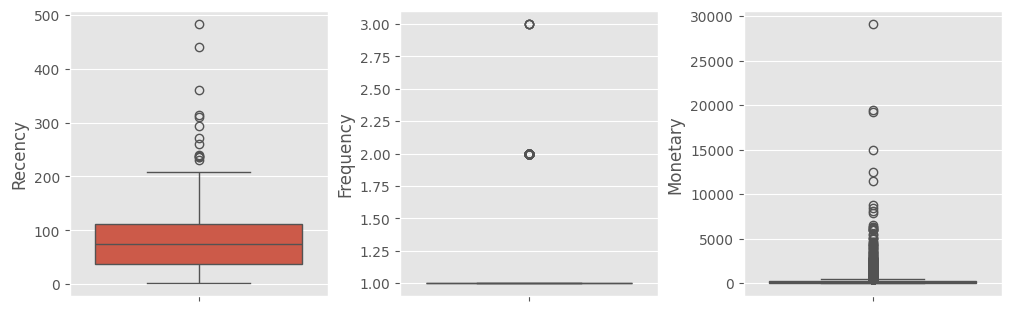

In [102]:
# Check the distribution of recency, frequency, and monetary
rfm_range=rfm_data.copy()
rfm_range=rfm_range.drop(['customer_unique_id', 'order_purchase_timestamp'], axis=1)
fig,ax = plt.subplots(1,3, figsize = (10,3), constrained_layout = True)
for a,b in enumerate(list(rfm_range.columns)):
    sns.boxplot(y = rfm_range[b], ax = ax[a])
plt.savefig(f'data visulization of rfm distribution.png')
plt.show()

We can exclude outliers that fall within +/5% boundaries except Frequency. 2 or 3 of frequencies should not be considered outliers.

In [103]:
import pandas as pd

def remove_outliers_iqr(df, exclude_cols=None):
    """
    Remove outliers from the DataFrame based on the Interquartile Range (IQR), excluding specified columns.

    Parameters:
    - df (pd.DataFrame): The input DataFrame from which to remove outliers.
    - exclude_cols (list of str): Columns to exclude from outlier removal (default is None, which means no exclusion).

    Returns:
    - pd.DataFrame: A DataFrame with outliers removed.
    """
    if exclude_cols is None:
        exclude_cols = []

    df_cleaned = df.copy()

    for col in df_cleaned.columns:
        if col not in exclude_cols and pd.api.types.is_numeric_dtype(df_cleaned[col]):
            # Calculate the IQR
            Q1 = df_cleaned[col].quantile(0.05)
            Q3 = df_cleaned[col].quantile(0.95)
            IQR = Q3 - Q1

            # Define outlier boundaries
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter the DataFrame to remove outliers
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

In [104]:
# Example usage
exclude_columns = ['Frequency']
rfm_data_cleaned = remove_outliers_iqr(rfm_data, exclude_cols=exclude_columns)

In [105]:
rfm_data_cleaned.shape

(9230, 5)

In [106]:
rfm_data2= rfm_data_cleaned.copy()
rfm_data2

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,113,1,141.90
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26,10,1,27.75
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49,34,1,122.07
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,6,1,329.62
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,122,1,197.27
...,...,...,...,...,...
9328,ffeb904468642a1ce663a322629801cb,2018-06-27 11:57:41,65,1,93.11
9329,ffecceca389973ef16660d58696f281e,2018-04-25 12:08:11,128,1,72.76
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47,133,1,200.90
9331,fff3e1d7bc75f11dc7670619b2e61840,2018-07-20 13:47:30,42,1,82.51


Create a function to assign scores to RFM based on boundaries:

In [107]:
def assign_score(value, boundaries):
    if value <= boundaries[0]:
        return 1
    elif value <= boundaries[1]:
        return 2
    elif value <= boundaries[2]:
        return 3
    elif value <= boundaries[3]:
        return 4
    elif value <= boundaries[4]:
        return 5
    else:
        return 6

def assign_score_2(value, boundaries):
    if value <= boundaries[0]:
        return 6
    elif value <= boundaries[1]:
        return 5
    elif value <= boundaries[2]:
        return 4
    elif value <= boundaries[3]:
        return 3
    elif value <= boundaries[4]:
        return 2
    else:
        return 1

# Distribute portions of Recency, Frequency, Monetary, and Length
r_boundaries = np.percentile(rfm_data2['Recency'], [2.5, 13.5, 34, 66, 86.5, 97.5])
f_boundaries = np.percentile(rfm_data2['Frequency'], [2.5, 13.5, 34, 66, 86.5, 97.5])
m_boundaries = np.percentile(rfm_data2['Monetary'], [2.5, 13.5, 34, 66, 86.5, 97.5])

# Assign scores to each criterion
rfm_data2['R_Score'] = rfm_data2['Recency'].apply(lambda x: assign_score_2(x, r_boundaries))
rfm_data2['F_Score'] = rfm_data2['Frequency'].apply(lambda x: assign_score(x, f_boundaries))
rfm_data2['M_Score'] = rfm_data2['Monetary'].apply(lambda x: assign_score(x, m_boundaries))

# Calculate RFM scores
rfm_data2['RFM_Score'] = rfm_data2['R_Score'] + rfm_data2['F_Score'] + rfm_data2['M_Score']

rfm_data2

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,113,1,141.90,2,1,4,7
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26,10,1,27.75,6,1,1,8
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49,34,1,122.07,4,1,4,9
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,6,1,329.62,6,1,5,12
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,122,1,197.27,2,1,5,8
...,...,...,...,...,...,...,...,...,...
9328,ffeb904468642a1ce663a322629801cb,2018-06-27 11:57:41,65,1,93.11,3,1,4,8
9329,ffecceca389973ef16660d58696f281e,2018-04-25 12:08:11,128,1,72.76,1,1,3,5
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47,133,1,200.90,1,1,5,7
9331,fff3e1d7bc75f11dc7670619b2e61840,2018-07-20 13:47:30,42,1,82.51,4,1,3,8


In [108]:
# Find the values for boundaries
recency_values = rfm_data2['Recency']

frequency_values = rfm_data2['Frequency']

monetary_values = rfm_data2['Monetary']

def calculate_boundaries(values, name):
    percentiles = [97.5, 86.5, 66, 34, 13.5, 2.5]
    if name == 'Recency':
        percentiles = percentiles[::-1]
    boundaries = {str(6-i): np.percentile(values, p) for i, p in enumerate(percentiles)}
    return boundaries

boundaries_all = {
    'Recency': calculate_boundaries(rfm_data2['Recency'], 'Recency'),
    'Frequency': calculate_boundaries(rfm_data2['Frequency'], 'Frequency'),
    'Monetary': calculate_boundaries(rfm_data2['Monetary'], 'Monetary'),
}

for feature, bounds in boundaries_all.items():
    print(f"{feature} boundaries:")
    for score, boundary in sorted(bounds.items()):
        print(f"Score {score}: {boundary}")
    print()

Recency boundaries:
Score 1: 143.0
Score 2: 125.0
Score 3: 101.0
Score 4: 48.0
Score 5: 23.0
Score 6: 10.0

Frequency boundaries:
Score 1: 1.0
Score 2: 1.0
Score 3: 1.0
Score 4: 1.0
Score 5: 1.0
Score 6: 1.0

Monetary boundaries:
Score 1: 27.88
Score 2: 48.13
Score 3: 85.49
Score 4: 169.0728
Score 5: 353.8919
Score 6: 977.891999999999



We would like to pursue weighted and non-weighted customer classification methods. We will start with the non-weighted customer classification first. Also, we need to exclude frequency score because it has a low discrimination.

In [109]:
# non-weighted customer classification
def classify_customer(row):
    r, m = row['R_Score'], row['M_Score']
     # VIP
    if r >= 5 and  m >= 5:
        return 'VIP'
    # VIP churned customer: Recency is not more than 3, but other scores are not less than 4.
    elif r <= 3 and (m >= 4):
        return 'VIP churned customer'
    elif r >= 4 and m >= 4:
        return 'Loyal customer'
    elif r >= 3 and m >= 3:
        return 'Potential loyal customer'
    elif r <= 2:
        return 'Loyal churned customer'
    else:
        return 'Regular customer'

rfm_data2['Customer_Grading'] = rfm_data2.apply(classify_customer, axis=1)

rfm_data2.head()

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer_Grading
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,113,1,141.90,2,1,4,7,VIP churned customer
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26,10,1,27.75,6,1,1,8,Regular customer
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49,34,1,122.07,4,1,4,9,Loyal customer
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,6,1,329.62,6,1,5,12,VIP
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,122,1,197.27,2,1,5,8,VIP churned customer


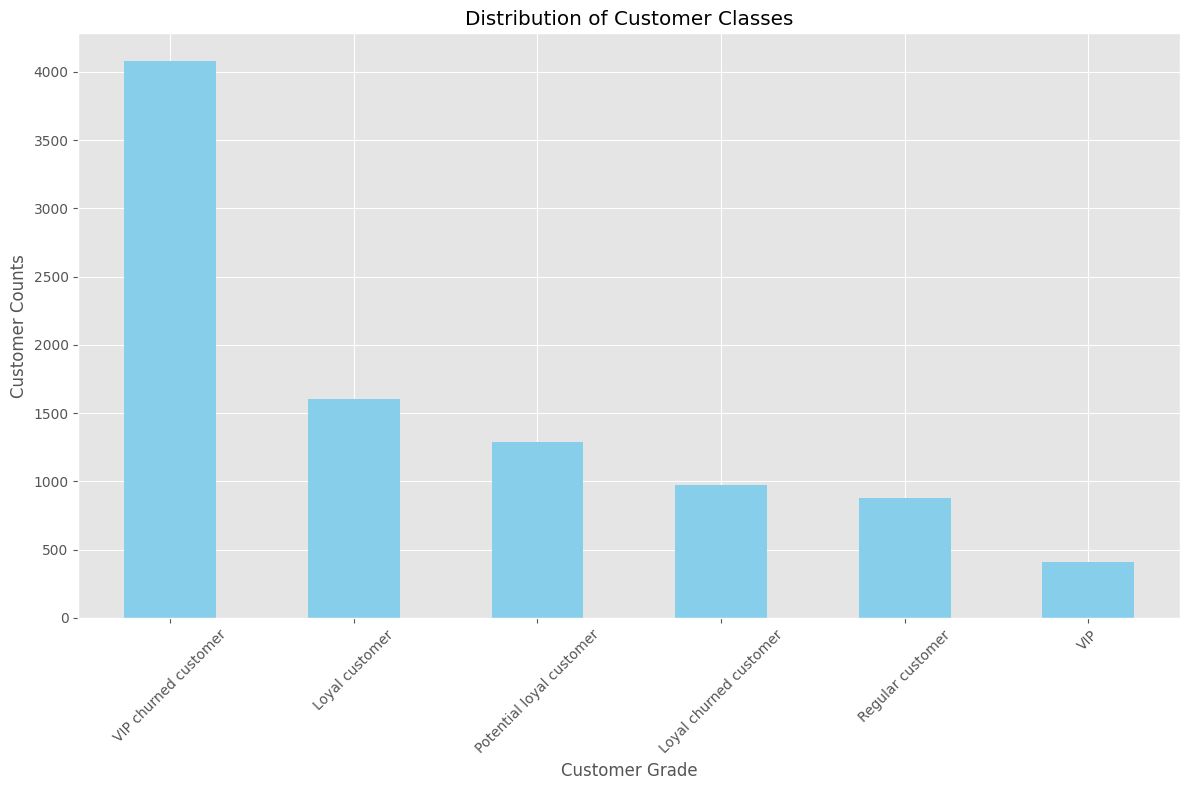

In [111]:
# Make a bar plot to figure out the distribution of customer classes
customer_class_counts_desc = rfm_data2['Customer_Grading'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
customer_class_counts_desc.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Classes')
plt.xlabel('Customer Grade')
plt.ylabel('Customer Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# K-Means

Now we are going to segment customers in an weighted calculation. For this, we will use K-Means, hyperparameter tuning, and feature importances.

In [112]:
# Load required libraries
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [113]:
rfm_data2

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer_Grading
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,113,1,141.90,2,1,4,7,VIP churned customer
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26,10,1,27.75,6,1,1,8,Regular customer
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49,34,1,122.07,4,1,4,9,Loyal customer
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,6,1,329.62,6,1,5,12,VIP
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,122,1,197.27,2,1,5,8,VIP churned customer
...,...,...,...,...,...,...,...,...,...,...
9328,ffeb904468642a1ce663a322629801cb,2018-06-27 11:57:41,65,1,93.11,3,1,4,8,VIP churned customer
9329,ffecceca389973ef16660d58696f281e,2018-04-25 12:08:11,128,1,72.76,1,1,3,5,Loyal churned customer
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47,133,1,200.90,1,1,5,7,VIP churned customer
9331,fff3e1d7bc75f11dc7670619b2e61840,2018-07-20 13:47:30,42,1,82.51,4,1,3,8,Potential loyal customer


In [114]:
# Contain only necessary columns
cluster = rfm_data2.drop(['Customer_Grading','order_purchase_timestamp','RFM_Score', 'R_Score', 'F_Score', 'M_Score'], axis = 1)
cluster.set_index("customer_unique_id", inplace=True)
cluster

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75
00172711b30d52eea8b313a7f2cced02,34,1,122.07
001928b561575b2821c92254a2327d06,6,1,329.62
0019e8c501c85848ac0966d45226fa1d,122,1,197.27
...,...,...,...
ffeb904468642a1ce663a322629801cb,65,1,93.11
ffecceca389973ef16660d58696f281e,128,1,72.76
fff2ae16b99c6f3c785f0e052f2a9cfb,133,1,200.90


In [115]:
# Use K-Means and calculate inertia, which is a sum of squared distances
X= MinMaxScaler().fit_transform(cluster)

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

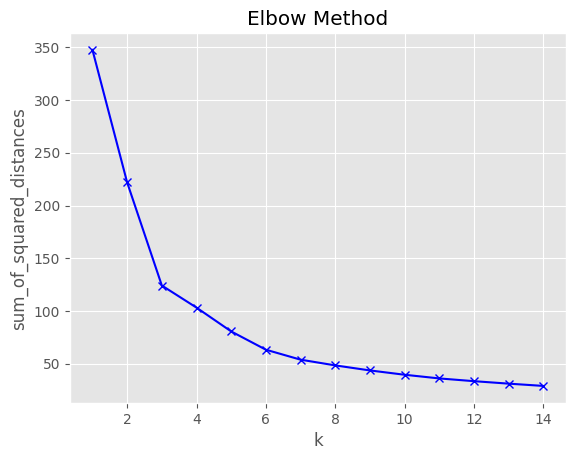

In [116]:
# Draw a line plot by using the Elbow method
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

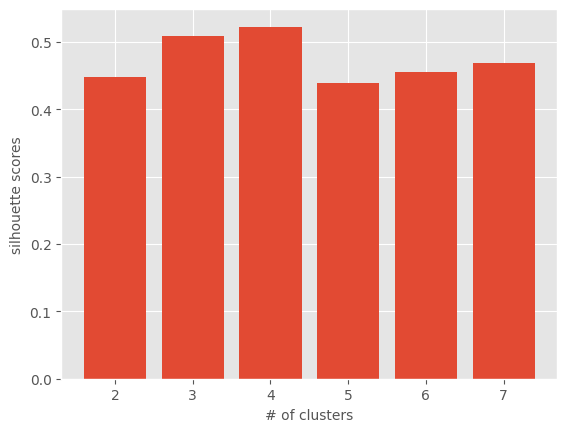

In [117]:
# Calculate silhouette scores as well
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X)))

k = [2, 3, 4, 5, 6, 7]
plt.bar(k, silhouette_scores)
plt.xlabel('# of clusters', fontsize = 10)
plt.ylabel('silhouette scores', fontsize = 10)
plt.show()

 k = 3 is a good choice because it is the point where the inertia curve starts to flatten out, indicating a good balance between minimizing the sum of squared distances and avoiding overfitting.
 Meanwhile, k = 4 might be the better choice, as it provides the highest silhouette score, indicating that the additional cluster provides a more distinct grouping. In conclusion, we are going to choose k = 4.

In [118]:
# Calculate silhouette scores when the number of grouping is 4
k_means = KMeans(n_clusters=4)
model = k_means.fit(X)
y_hat = k_means.predict(X)
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.5226631310832258

In [119]:
# Establish labels for each row
cluster['Cluster'] = labels

In [120]:
# Calculate the number of each cluster.
# Calculate means of Recency, Frequency, and Monetary
table = cluster.groupby('Cluster').agg({'Recency': 'mean', 'Frequency':'mean', 'Monetary': 'mean'})
table['# of cluster'] = cluster['Cluster'].value_counts()
table

,Recency,Frequency,Monetary,# of cluster
Cluster,,,,
0,111.361611,1.000000,145.749055,4220
1,38.073694,1.000000,142.674000,4288
2,80.094249,1.003195,958.203930,626
3,59.135417,2.041667,402.995833,96


In [121]:
# Understand the cluster dataframe
cluster

,Recency,Frequency,Monetary,Cluster
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,0
000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75,1
00172711b30d52eea8b313a7f2cced02,34,1,122.07,1
001928b561575b2821c92254a2327d06,6,1,329.62,1
0019e8c501c85848ac0966d45226fa1d,122,1,197.27,0
...,...,...,...,...
ffeb904468642a1ce663a322629801cb,65,1,93.11,1
ffecceca389973ef16660d58696f281e,128,1,72.76,0
fff2ae16b99c6f3c785f0e052f2a9cfb,133,1,200.90,0


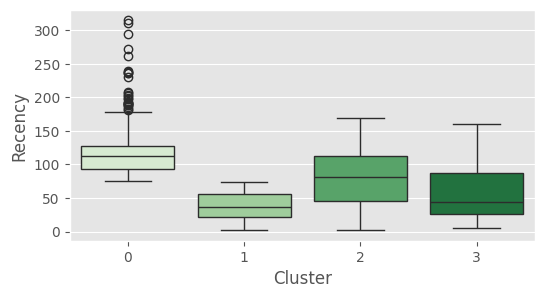

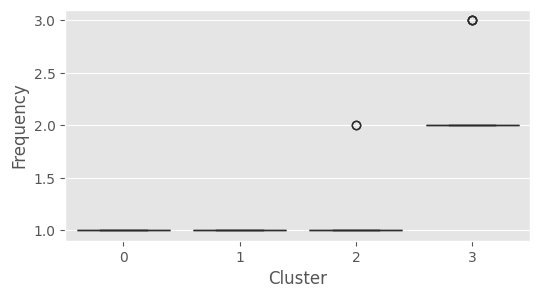

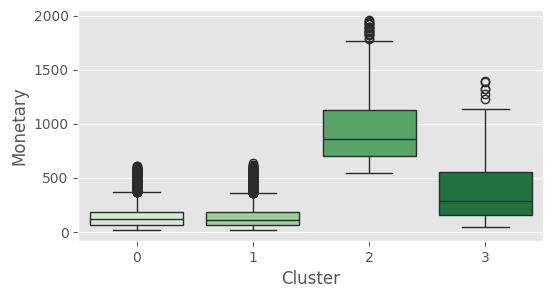

In [122]:
# Draw boxplots of Recency, Frequency, and Monetary values for each cluster
for i,c in enumerate(list(cluster.columns[:3])):
    plt.figure(figsize = (6,3))
    sns.boxplot(y = cluster[c], x = cluster['Cluster'], order = [0,1,2,3], palette='Greens')
    plt.show()

## Hyperparameter Tuning

We are going to apply hyperparameter tuning to obtain weights for each feature. We can optimize the performance of a machine learning model by finding the best combination of hyperparameters.

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Data preprocessing
X = MinMaxScaler().fit_transform(cluster.drop('Cluster', axis=1))
y = cluster['Cluster']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the randomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Setting up the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fitting the model
grid_search.fit(X_train, y_train)

# Retrieving the best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


In [124]:
# Evaluating the best model on the test set
best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Test Set Accuracy: 0.9978


Now we are going to train the model with the optimal hyperparameters and evaluate the performance on the test set.

In [125]:
from sklearn.metrics import accuracy_score
# Initializing the optimized model with the best hyperparameters
rf_optimized = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=4,
    max_features='sqrt',
    random_state=0
)

# Training the model
rf_optimized.fit(X_train, y_train)

# Evaluating performance on the training set
y_train_pred = rf_optimized.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Set Accuracy: {train_accuracy:.4f}")

# Evaluating performance on the test set
y_test_pred = rf_optimized.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Set Accuracy: {test_accuracy:.4f}")

Training Set Accuracy: 1.0000
Test Set Accuracy: 0.9978


## Feature importances

 Knowing which features are most influential helps stakeholders understand and trust the model's predictions.

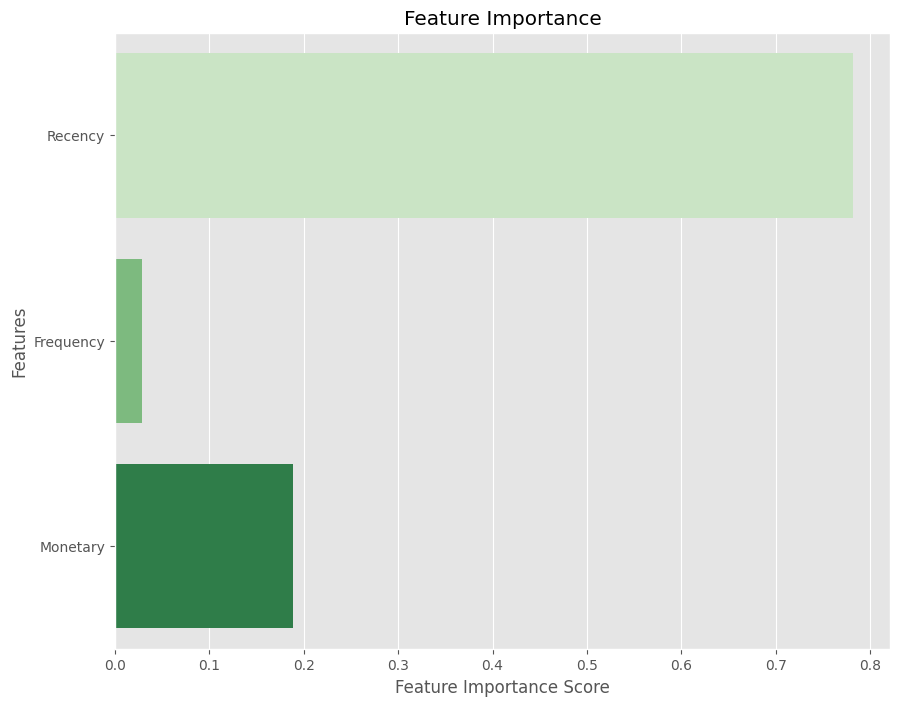

Recency: 0.78
Frequency: 0.03
Monetary: 0.19


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x=rf_optimized.feature_importances_, y=cluster.columns[:3], palette='Greens')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# Calculate the weights
feature_importances = rf_optimized.feature_importances_
score = feature_importances / feature_importances.sum()

# Printing the weight for each feature
for feature, importance in zip(cluster.columns[:3], score):
    print(f'{feature}: {round(importance, 2)}')

## Calculting RFM scores by using the weights

In [127]:
rfm_data2["RFM"] = rfm_data2['R_Score'] * score[0]+ rfm_data2['F_Score'] * score[1] + rfm_data2['M_Score'] * score[2]
rfm_data2['RFM'].describe()

,RFM
count,9230.000000
mean,3.164327
std,1.025310
min,1.000000
25%,2.349277
50%,3.131301
75%,3.913325
max,6.000000


## Refining grades using RFM scores derived from weights

In [128]:
## Sourced from American Express with their membership rewards program
# Refined grades using weighted RFM scores
def segment(row):
    if row <= 3:
        return 'Bronze'
    elif row <= 4:
        return 'Silver'
    elif row <= 5:
        return 'Gold'
    else:
        return 'Platinum'

In [129]:
rfm_data2['Weighted_Customer_Grading'] = rfm_data2['RFM'].apply(segment)

In [130]:
rfm_data2['Weighted_Customer_Grading'].value_counts()

,count
Weighted_Customer_Grading,
Bronze,4100
Silver,3202
Gold,1522
Platinum,406


The proportion of each weighted customer grade

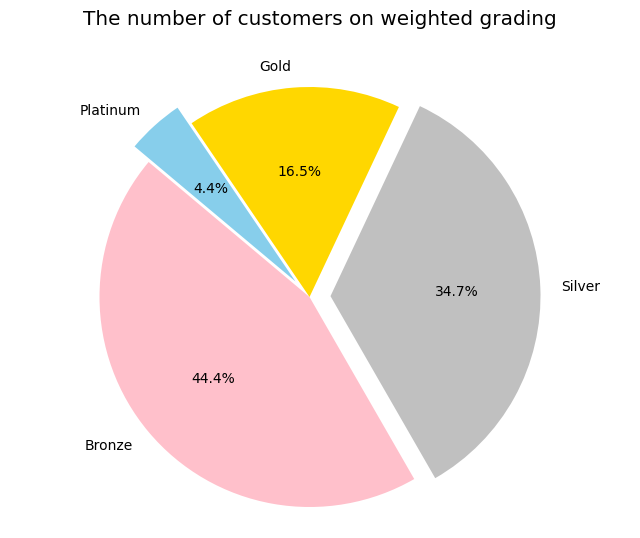

In [131]:
# Calculating the counts for each customer grade
grade_counts = rfm_data2['Weighted_Customer_Grading'].value_counts()

# Preparing labels and sizes for the pie chart
labels = grade_counts.index
sizes = grade_counts.values

# Customizing the pie chart's appearance
colors = ['pink', 'silver', 'gold', 'skyblue']
explode = (0, 0.1, 0, 0.1)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('The number of customers on weighted grading', pad=30)
plt.axis('equal')
plt.show()

Checking the distribution for pairs between Recency and Monetary

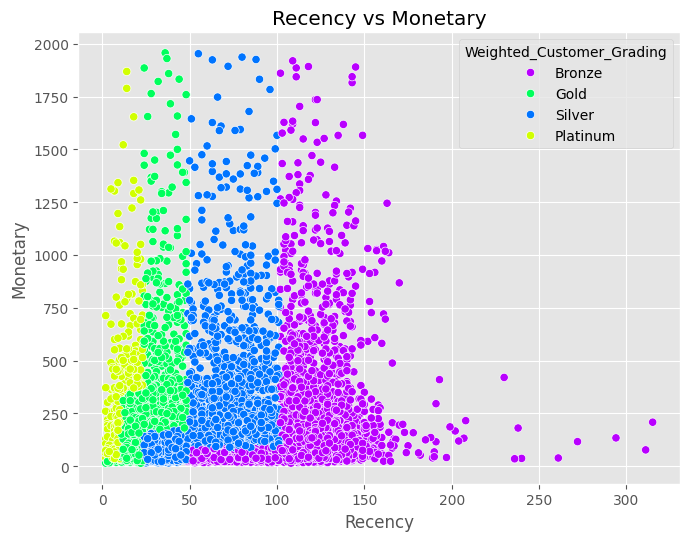

In [132]:
# Identifying unique grades and defining order
unique_grades = rfm_data2['Weighted_Customer_Grading'].unique()
grade_order = ['Platinum', 'Gold', 'Silver', 'Bronze']

# Creating a color palette and mapping
palette = sns.color_palette("hsv", len(unique_grades))
color_mapping = {grade: color for grade, color in zip(grade_order, palette)}

# Setting up the plot
fig, ax = plt.subplots(figsize=(7, 6))

# Creating a scatter plot
sns.scatterplot(ax=ax, x='Recency', y='Monetary', data=rfm_data2, hue='Weighted_Customer_Grading', palette=color_mapping)
ax.set_title('Recency vs Monetary')
handles, labels = ax.get_legend_handles_labels()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Checking only the distribution of Platinum and Gold

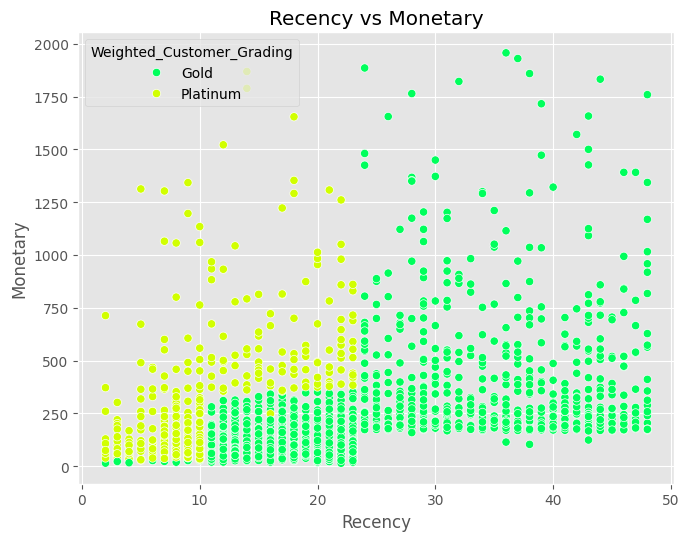

In [133]:
platinum_gold_data = rfm_data2[rfm_data2['Weighted_Customer_Grading'].isin(['Platinum', 'Gold'])]

palette_restricted = {grade: color for grade, color in color_mapping.items() if grade in ['Platinum', 'Gold']}

# Setting up the plot
fig, ax = plt.subplots(figsize=(7, 6))

# Creating a scatter plot
sns.scatterplot(ax=ax, x='Recency', y='Monetary', data=platinum_gold_data, hue='Weighted_Customer_Grading', palette=palette_restricted)
ax.set_title('Recency vs Monetary')
handles, labels = ax.get_legend_handles_labels()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

# Mixed method of weighted and non-weighted scores

We can classify customers with a mixed way of weighted and non-weighted RFM scores.

* Non-weighted classificatio for customers:
 - VIP: r≥5, m≥5
 - VIP Churned: r≤3, m≥4
 - Loyal: r≤4, m≥4
 - Potential Loyal: r≥3, m≥4
 - Loyal Churned: r≤2
 - Else

## Reclassification

In [135]:
# Classify customers with a mixed way of weighted and non-weighted RFM scores.
import pandas as pd

grade_combinations = rfm_data2.groupby(['Customer_Grading', 'Weighted_Customer_Grading']).size().reset_index(name='Count')

grade_combinations_sorted = grade_combinations.sort_values(by='Weighted_Customer_Grading', ascending=False)

grade_combinations_sorted

,Customer_Grading,Weighted_Customer_Grading,Count
3,Loyal customer,Silver,582
7,Potential loyal customer,Silver,385
11,Regular customer,Silver,279
15,VIP churned customer,Silver,1956
2,Loyal customer,Platinum,80
6,Potential loyal customer,Platinum,85
10,Regular customer,Platinum,33
13,VIP,Platinum,208
1,Loyal customer,Gold,942
5,Potential loyal customer,Gold,229


## Targeting on Platinum and Gold customers

Let's focus on Platinum and Gold customers.

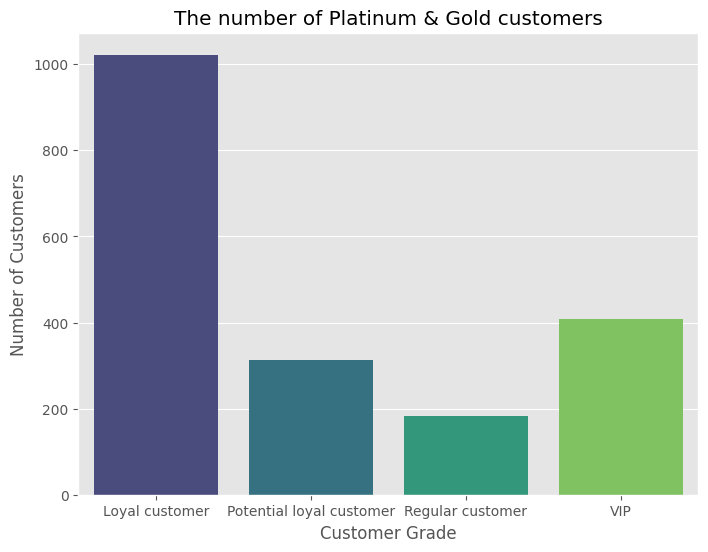

In [136]:
filtered_data = rfm_data2[rfm_data2['Weighted_Customer_Grading'].isin(['Platinum', 'Gold'])]

aggregated_data = filtered_data.groupby('Customer_Grading').size().reset_index(name='Count')

plt.figure(figsize=(8, 6))
sns.barplot(x='Customer_Grading', y='Count', data=aggregated_data, palette='viridis')
plt.title('The number of Platinum & Gold customers')
plt.xlabel('Customer Grade')
plt.ylabel('Number of Customers')
plt.show()

In [138]:
# The number of customers based on non-weighted customer grading
aggregated_data

,Customer_Grading,Count
0,Loyal customer,1022
1,Potential loyal customer,314
2,Regular customer,184
3,VIP,408


## The purchase ratio by product category among platinum and gold customers

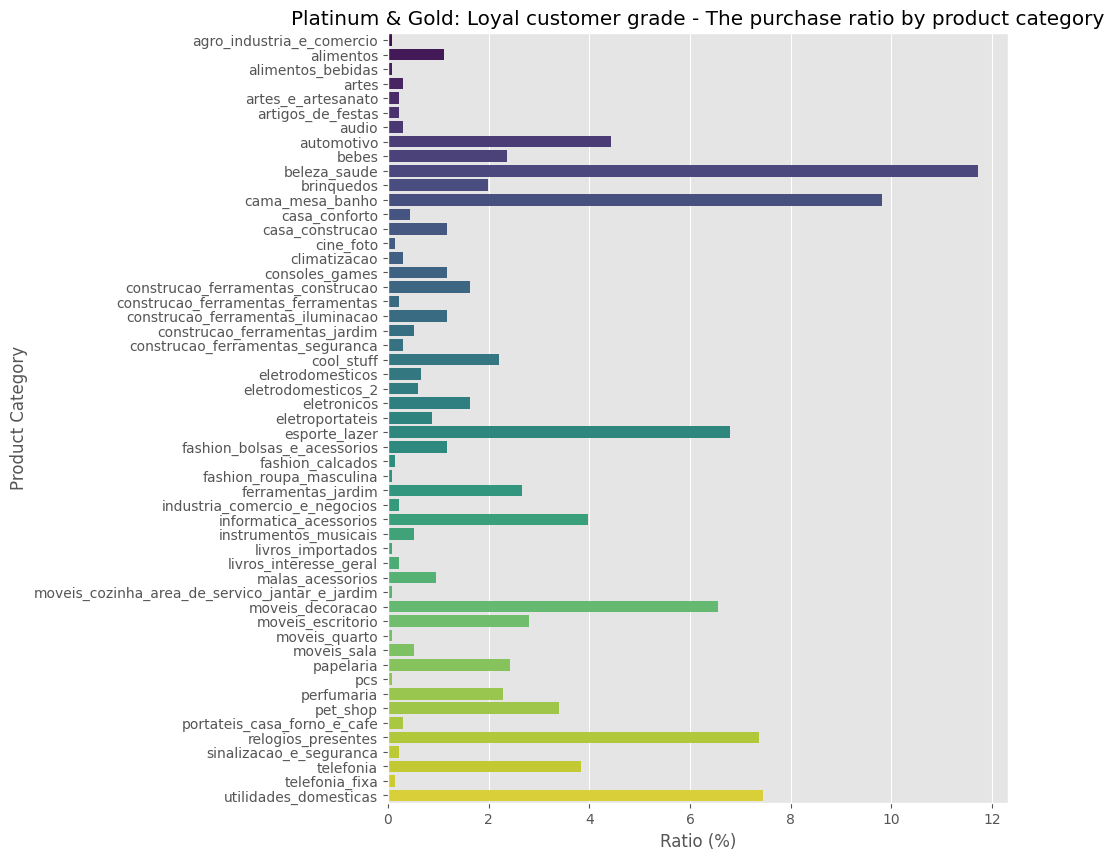

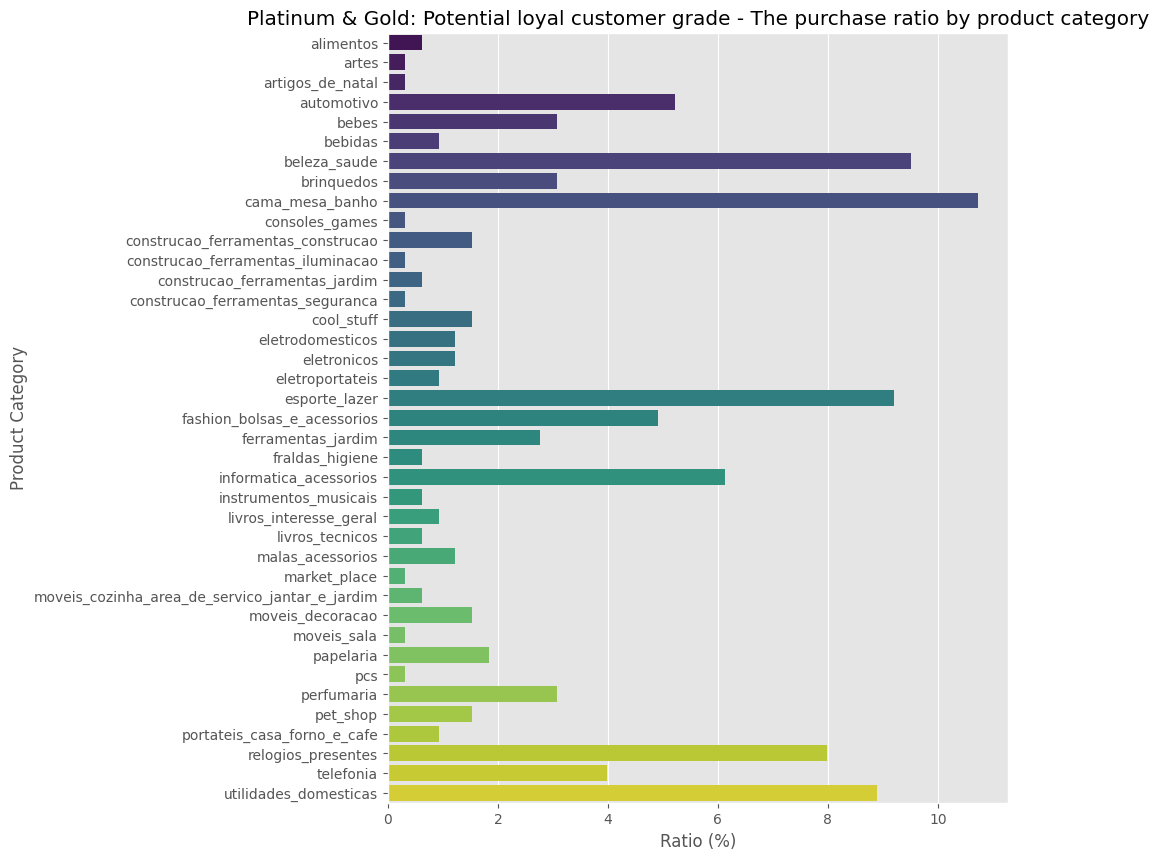

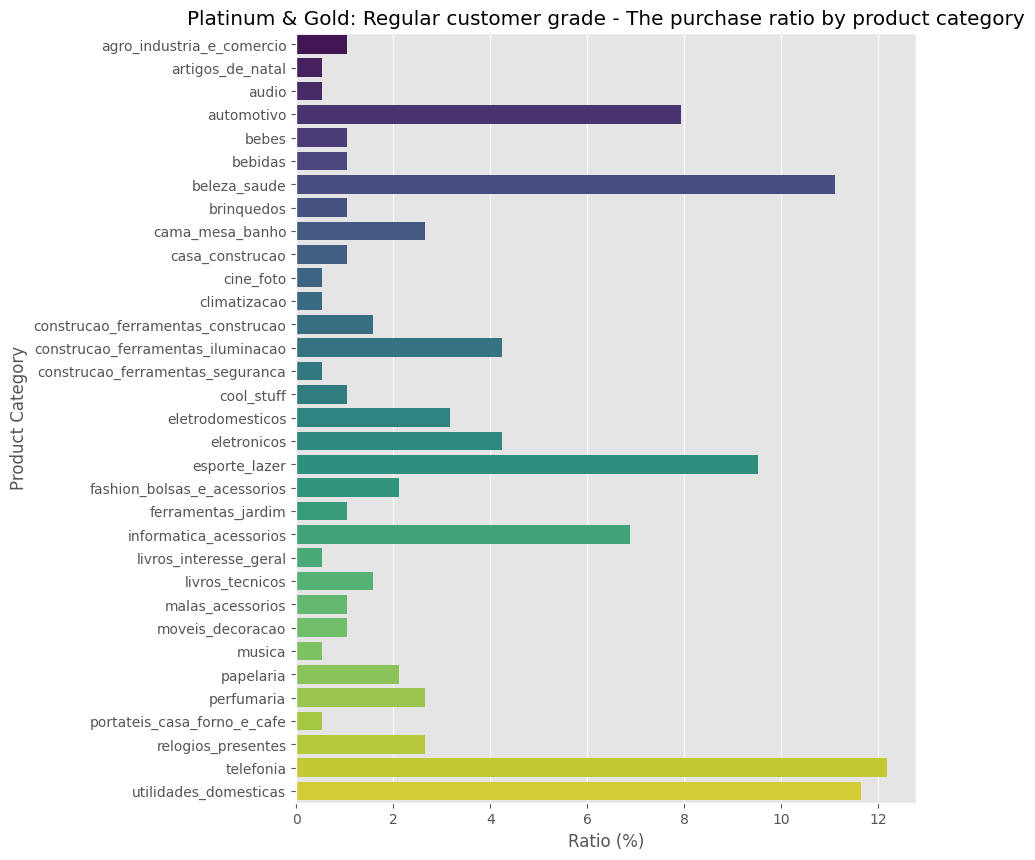

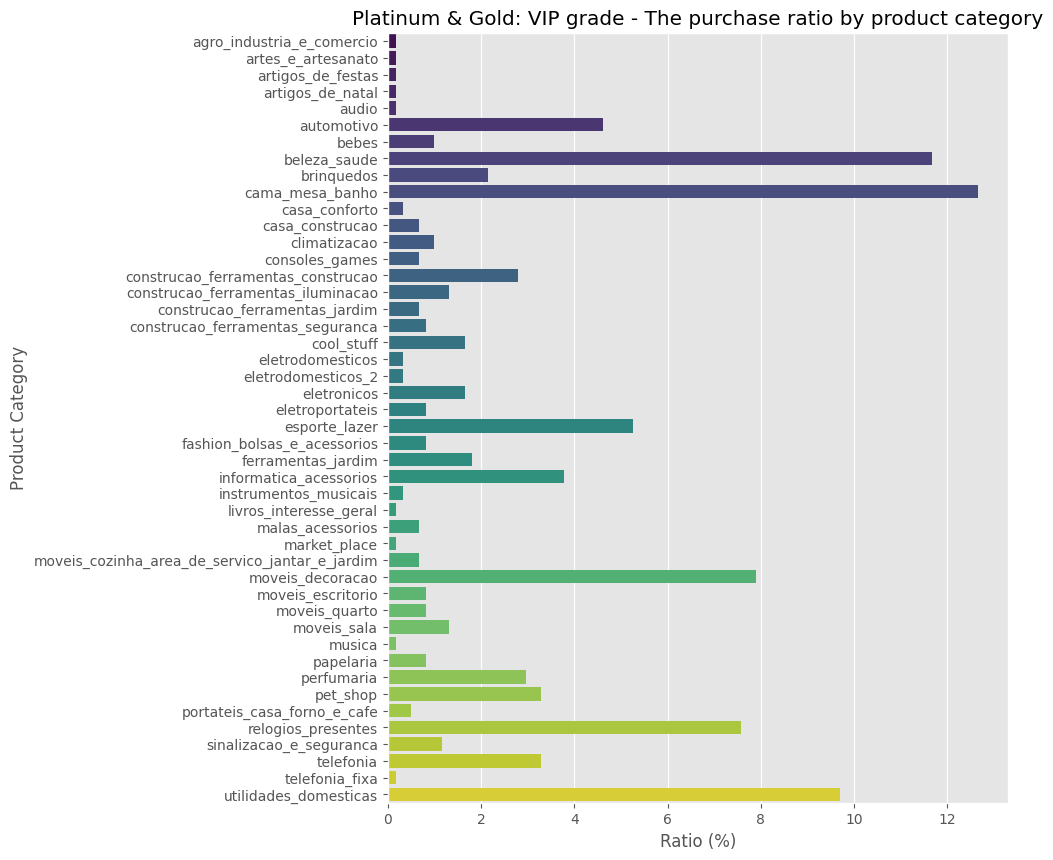

In [141]:
combined_data = pd.merge(merged_df, filtered_data[['customer_unique_id', 'Customer_Grading']], on='customer_unique_id', how='inner')

category_ratio_by_grade = combined_data.groupby(['Customer_Grading', 'product_category_name']).size()
category_ratio_by_grade = category_ratio_by_grade / category_ratio_by_grade.groupby(level=0).sum() * 100
category_ratio_by_grade = category_ratio_by_grade.reset_index(name='ratio')
grades = category_ratio_by_grade['Customer_Grading'].unique()

for grade in grades:
    plt.figure(figsize=(8, 10))
    grade_data = category_ratio_by_grade[category_ratio_by_grade['Customer_Grading'] == grade]
    sns.barplot(x='ratio', y='product_category_name', data=grade_data, palette='viridis')
    plt.title(f'Platinum & Gold: {grade} grade - The purchase ratio by product category')
    plt.xlabel('Ratio (%)')
    plt.ylabel('Product Category')
    plt.show()

## The purchase ratio by customer grade (Platinum & Gold)

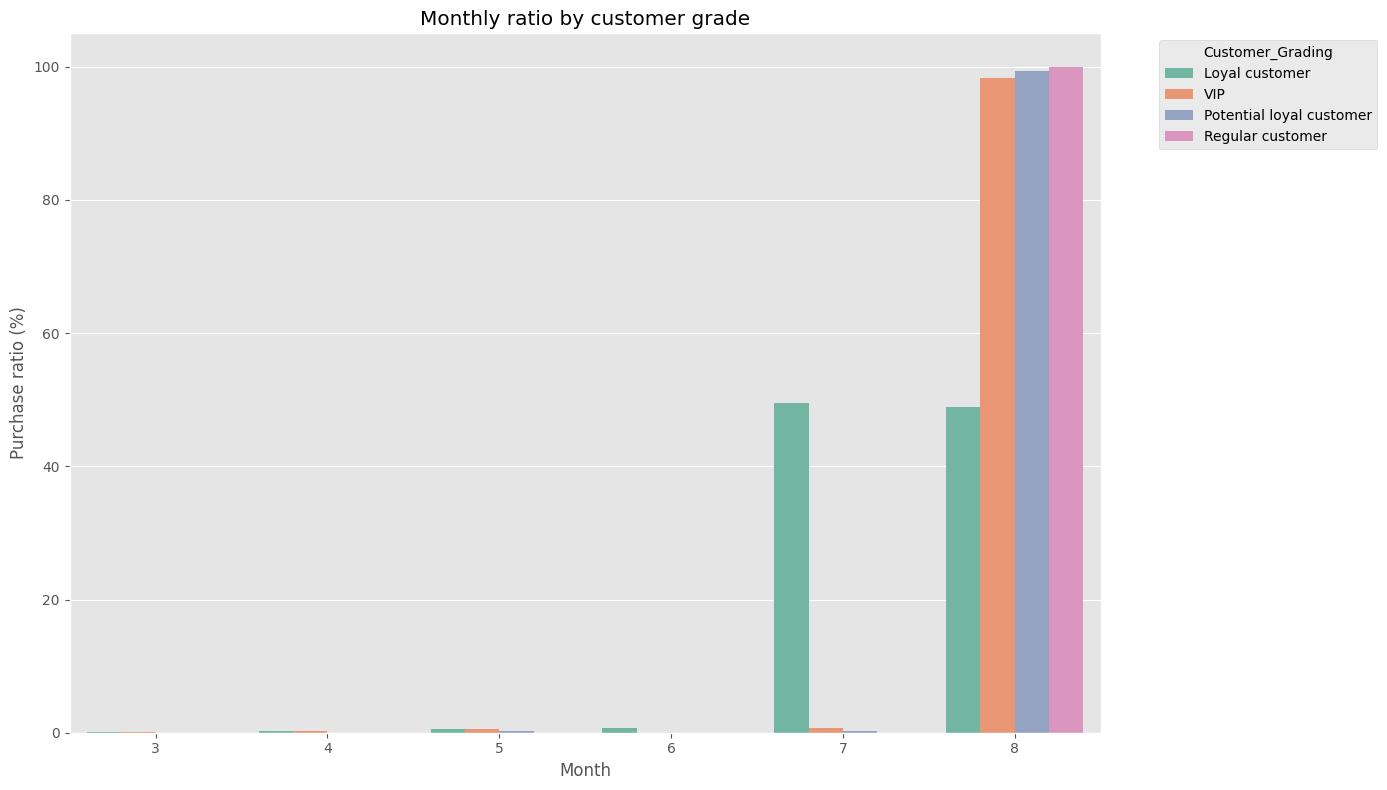

In [143]:
combined_data['month'] = combined_data['order_purchase_timestamp'].dt.month

monthly_purchase_ratio = combined_data.groupby(['Customer_Grading', 'month']).size()
monthly_purchase_ratio = monthly_purchase_ratio / monthly_purchase_ratio.groupby(level=0).sum() * 100
monthly_purchase_ratio = monthly_purchase_ratio.reset_index(name='ratio')

plt.figure(figsize=(14, 8))
sns.barplot(x='month', y='ratio', hue='Customer_Grading', data=monthly_purchase_ratio, palette='Set2')
plt.title('Monthly ratio by customer grade')
plt.xlabel('Month')
plt.ylabel('Purchase ratio (%)')
plt.legend(title='Customer_Grading', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()